# <center> Algorithmic Trading Strategy (ADANIGREEN-NSE)
---

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [52]:
data = pd.read_csv("ADANIGREEN.NS.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,31.500000,7006229.0
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,32.599998,2895692.0
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,31.000000,1115553.0
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,29.650000,2854524.0
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,29.450001,1612972.0
...,...,...,...,...,...,...,...
616,2020-12-17,1023.900024,1059.400024,1013.750000,1041.550049,1041.550049,686579.0
617,2020-12-18,1058.400024,1058.400024,1001.000000,1016.150024,1016.150024,1037435.0
618,2020-12-21,1004.799988,1040.000000,971.000000,1020.299988,1020.299988,999121.0
619,2020-12-22,992.000000,1040.000000,976.000000,1029.900024,1029.900024,637121.0


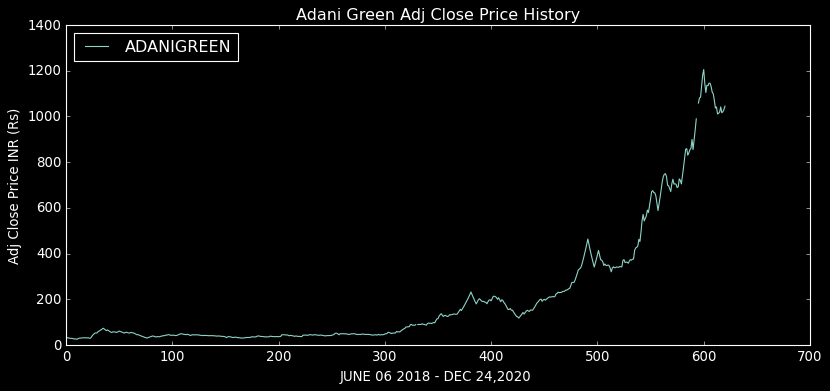

In [53]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close'], label='ADANIGREEN')
plt.title('Adani Green Adj Close Price History')
plt.xlabel("JUNE 06 2018 - DEC 24,2020 ")
plt.ylabel("Adj Close Price INR (Rs)")
plt.legend(loc="upper left")
plt.show()

## Creating a Simple moving average with a 30 day window

In [54]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = data['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
616,NaN
617,NaN
618,NaN
619,NaN


## Creating a Simple moving average with a 100 day window

In [55]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = data['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
616,NaN
617,NaN
618,NaN
619,NaN


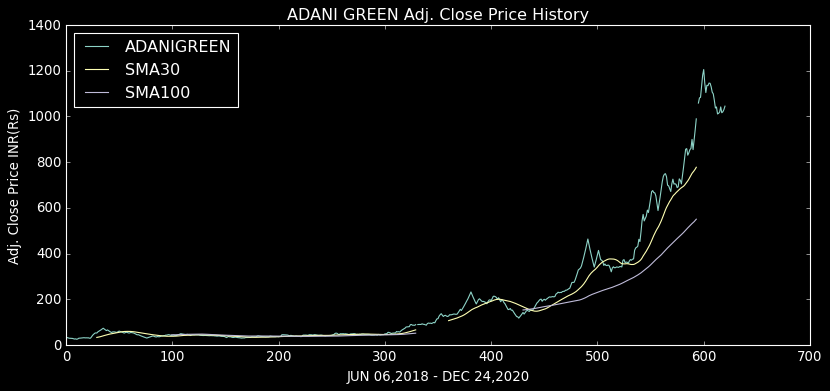

In [56]:
plt.figure(figsize=(12,5))
plt.plot(data['Adj Close'], label='ADANIGREEN')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title("ADANI GREEN Adj. Close Price History")
plt.xlabel('JUN 06,2018 - DEC 24,2020')
plt.ylabel('Adj. Close Price INR(Rs)')
plt.legend(loc='upper left')
plt.show()

In [57]:
data2 = pd.DataFrame()
data2['ADANI'] =data['Adj Close']
data2['SMA30'] = sma30['Adj Close']
data2['SMA100'] = sma100['Adj Close']
data2

,ADANI,SMA30,SMA100
0,31.500000,NaN,NaN
1,32.599998,NaN,NaN
2,31.000000,NaN,NaN
3,29.650000,NaN,NaN
4,29.450001,NaN,NaN
...,...,...,...
616,1041.550049,NaN,NaN
617,1016.150024,NaN,NaN
618,1020.299988,NaN,NaN
619,1029.900024,NaN,NaN


## Function to signal when to buy or sell stock

In [58]:
def buySell(data2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data2['SMA30'][i] > data2['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data2['ADANI'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data2['SMA30'][i] < data2['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data2['ADANI'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [59]:
buySell = buySell(data2)
data2['Buy Signal Price'] = buySell[0]
data2['Sell Signal Price'] = buySell[1]
data2

,ADANI,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,31.500000,NaN,NaN,NaN,NaN
1,32.599998,NaN,NaN,NaN,NaN
2,31.000000,NaN,NaN,NaN,NaN
3,29.650000,NaN,NaN,NaN,NaN
4,29.450001,NaN,NaN,NaN,NaN
...,...,...,...,...,...
616,1041.550049,NaN,NaN,NaN,NaN
617,1016.150024,NaN,NaN,NaN,NaN
618,1020.299988,NaN,NaN,NaN,NaN
619,1029.900024,NaN,NaN,NaN,NaN


## Visualize the data and strategy to buy and sell stock

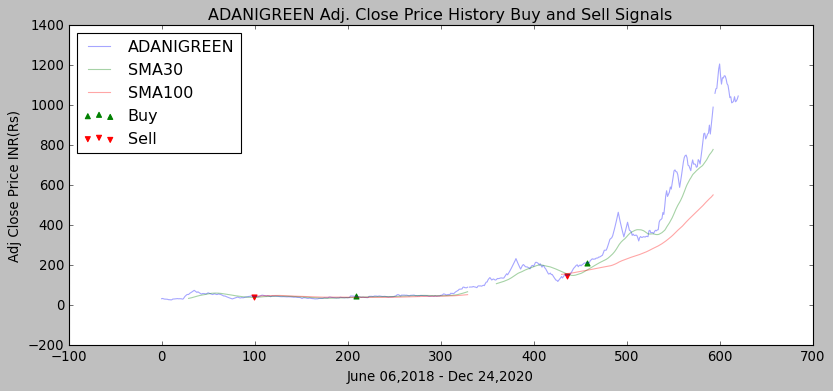

In [60]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data2['ADANI'], label='ADANIGREEN', alpha=0.35)
plt.plot(data2['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data2['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data2.index, data2['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data2.index, data2['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('ADANIGREEN Adj. Close Price History Buy and Sell Signals')
plt.xlabel("June 06,2018 - Dec 24,2020")
plt.ylabel("Adj Close Price INR(Rs)")
plt.legend(loc='upper left')
plt.show()

---